## Clasificación Clientes ifood

In [1]:
# Librerías a utilizar
import csv
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [2]:
# ignorar advertencias
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Cargamos el dataset que contiene las variables a estudiar
data= pd.read_excel("C:/Users/jorge/Desktop/IFood/factores_cluster.xlsx")

In [4]:
# Eliminamos la columna ID, 
data =data.drop(["ID"],axis=1)

In [5]:
df= data.copy()

In [6]:
#Creando el modelo
y = df.Response.values
x_data = df.drop(['Response'], axis = 1)

In [7]:
# Normalizamos las variables, que mas adelante me servirá para determinar la efectividad del ajuste
# Tomaremos el 80% de nuestros datos serán datos para el entrenamiento del modelo y el 20% serán datos de prueba.
x = (x_data - np.min(x_data)) / (np.max(x_data) - np.min(x_data)).values

In [8]:
# Creando los dataset de prueba y entrenamiento
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2,random_state=0)

In [9]:
#transponemos los dataset de prueba y entrenamiento  
x_train = x_train.T
y_train = y_train.T
x_test = x_test.T
y_test = y_test.T

In [10]:
# inicializando con las variables peso y sesgo
def initialize(dimension):
    
    peso = np.full((dimension,1),0.01)
    sesgo = 0.0
    return peso,sesgo

In [11]:
# probamos las dimensiones y el resultado obtenido con la función Sigmoid
def sigmoid(z):
    
    y_head = 1/(1+ np.exp(-z))
    return y_head

In [12]:
# Crear el modelo algoritmo de "avance-retroceso"
def forwardBackward(peso,sesgo,x_train,y_train):
    # Forward
    
    y_head = sigmoid(np.dot(peso.T,x_train) + sesgo)
    perd = -(y_train*np.log(y_head) + (1-y_train)*np.log(1-y_head))
    cost = np.sum(perd) / x_train.shape[1]
    
    # Backward
    derivative_peso = np.dot(x_train,((y_head-y_train).T))/x_train.shape[1]
    derivative_sesgo = np.sum(y_head-y_train)/x_train.shape[1]
    gradients = {"Peso Derivado" : derivative_peso, "Sesgo Derivado" : derivative_sesgo}
    
    return cost,gradients

In [13]:
def update(peso,sesgo,x_train,y_train,learningRate,iteration) :
    costList = []
    index = []
    
    # para cada iteración, actualizamos los valores de las variables peso y sesgo
    for i in range(iteration):
        cost,gradients = forwardBackward(peso,sesgo,x_train,y_train)
        peso = peso - learningRate * gradients["Peso Derivado"]
        sesgo = sesgo - learningRate * gradients["Sesgo Derivado"]
        
        costList.append(cost)
        index.append(i)

    parameters = {"peso": peso,"sesgo": sesgo}
    
    print("iteration:",iteration)
    print("cost:",cost)

    plt.plot(index,costList)
    plt.xlabel("Número de Iteraciones")
    plt.ylabel("Cost")
    plt.show()

    return parameters, gradients

In [14]:
# Creación de las sentencias de los predictores
def predict(peso,sesgo,x_test):
    z = np.dot(peso.T,x_test) + sesgo
    y_head = sigmoid(z)

    y_prediction = np.zeros((1,x_test.shape[1]))
    
    for i in range(y_head.shape[1]):
        if y_head[0,i] <= 0.5:
            y_prediction[0,i] = 0
        else:
            y_prediction[0,i] = 1
    return y_prediction

In [15]:
# Se define la Reresión logística
def logistic_regression(x_train,y_train,x_test,y_test,learningRate,iteration):
    dimension = x_train.shape[0]
    peso,sesgo = initialize(dimension)
    
    parameters, gradients = update(peso,sesgo,x_train,y_train,learningRate,iteration)

    y_prediction = predict(parameters["peso"],parameters["sesgo"],x_test)
    

    print("Manual Test Accuracy: {:.2f}%".format((100 - np.mean(np.abs(y_prediction - y_test))*100)/100*100))

iteration: 100
cost: 0.286351758441551


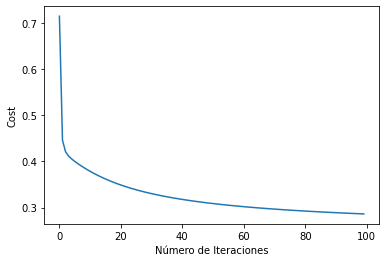

Manual Test Accuracy: 89.96%


In [16]:
logistic_regression(x_train,y_train,x_test,y_test,1,100)

In [17]:
# Modelo utilizando  la librería Sklearn
lr = LogisticRegression()
lr.fit(x_train.T,y_train.T)
print("Test Accuracy {:.2f}%".format(lr.score(x_test.T,y_test.T)*100))
lr.score

Test Accuracy 91.07%


<bound method ClassifierMixin.score of LogisticRegression()>

In [18]:
# KNN Model
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 2)  # n_neighbors means k
knn.fit(x_train.T, y_train.T)
prediction = knn.predict(x_test.T)

print("{} NN Score: {:.2f}%".format(2, knn.score(x_test.T, y_test.T)*100))

2 NN Score: 88.84%


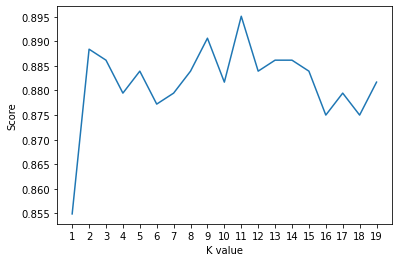

Maximum KNN Score is 89.51%


In [19]:
# tratamos de encontrar el mejor valor para el modelo
scoreList = []
for i in range(1,20):
    knn2 = KNeighborsClassifier(n_neighbors = i)  # n_neighbors means k
    knn2.fit(x_train.T, y_train.T)
    scoreList.append(knn2.score(x_test.T, y_test.T))
    
plt.plot(range(1,20), scoreList)
plt.xticks(np.arange(1,20,1))
plt.xlabel("K value")
plt.ylabel("Score")
plt.show()


print("Maximum KNN Score is {:.2f}%".format((max(scoreList))*100))

In [20]:
from sklearn.svm import SVC

In [21]:
svm = SVC(random_state = 1)
svm.fit(x_train.T, y_train.T)

SVC(random_state=1)

In [22]:
print("Exactitud de la prueba del algoritmo SVM: {:.2f}%".format(svm.score(x_test.T,y_test.T)*100))

Exactitud de la prueba del algoritmo SVM: 90.62%


In [23]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(x_train.T, y_train.T)
print("Exactitud de Naive Bayes: {:.2f}%".format(nb.score(x_test.T,y_test.T)*100))

Exactitud de Naive Bayes: 82.81%


In [24]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(x_train.T, y_train.T)
print("Exactitud de la prueba de Árbol de Decisión {:.2f}%".format(dtc.score(x_test.T, y_test.T)*100))

Exactitud de la prueba de Árbol de Decisión 86.83%


In [25]:
# Random Forest Classification o ramas del arbol de decisión
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 1000, random_state = 1)
rf.fit(x_train.T, y_train.T)
print("Precisión del Árbol de Decisión : {:.2f}%".format(rf.score(x_test.T,y_test.T)*100))

Precisión del Árbol de Decisión : 89.29%


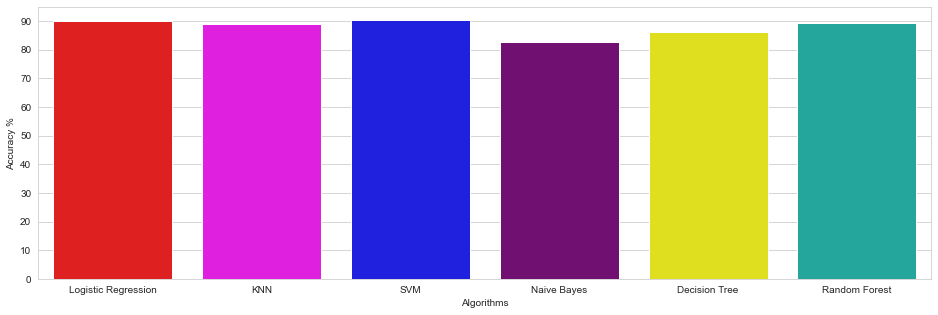

In [26]:
#Comparación de los modelos para certificar la precisión del modelo aplicado
methods = ["Logistic Regression", "KNN", "SVM", "Naive Bayes", "Decision Tree", "Random Forest"]
accuracy = [89.96, 88.84, 90.40,82.81, 86.16, 89.29]
colors = ["red", "magenta", "blue", "purple","yellow","#0FBBAE"]

sns.set_style("whitegrid")
plt.figure(figsize=(16,5))
plt.yticks(np.arange(0,100,10))
plt.ylabel("Accuracy %")
plt.xlabel("Algorithms")
sns.barplot(x=methods, y=accuracy, palette=colors)
plt.show()

In [27]:
# Mostramos la matriz de confusion para cada uno de los modelos con Sklearn
# Valores de predicción
y_head_lr = lr.predict(x_test.T)
knn3 = KNeighborsClassifier(n_neighbors = 3)
knn3.fit(x_train.T, y_train.T)
y_head_knn = knn3.predict(x_test.T)
y_head_svm = svm.predict(x_test.T)
y_head_nb = nb.predict(x_test.T)
y_head_dtc = dtc.predict(x_test.T)
y_head_rf = rf.predict(x_test.T)

In [28]:
from sklearn.metrics import confusion_matrix

cm_lr = confusion_matrix(y_test,y_head_lr)
cm_knn = confusion_matrix(y_test,y_head_knn)
cm_svm = confusion_matrix(y_test,y_head_svm)
cm_nb = confusion_matrix(y_test,y_head_nb)
cm_dtc = confusion_matrix(y_test,y_head_dtc)
cm_rf = confusion_matrix(y_test,y_head_rf)

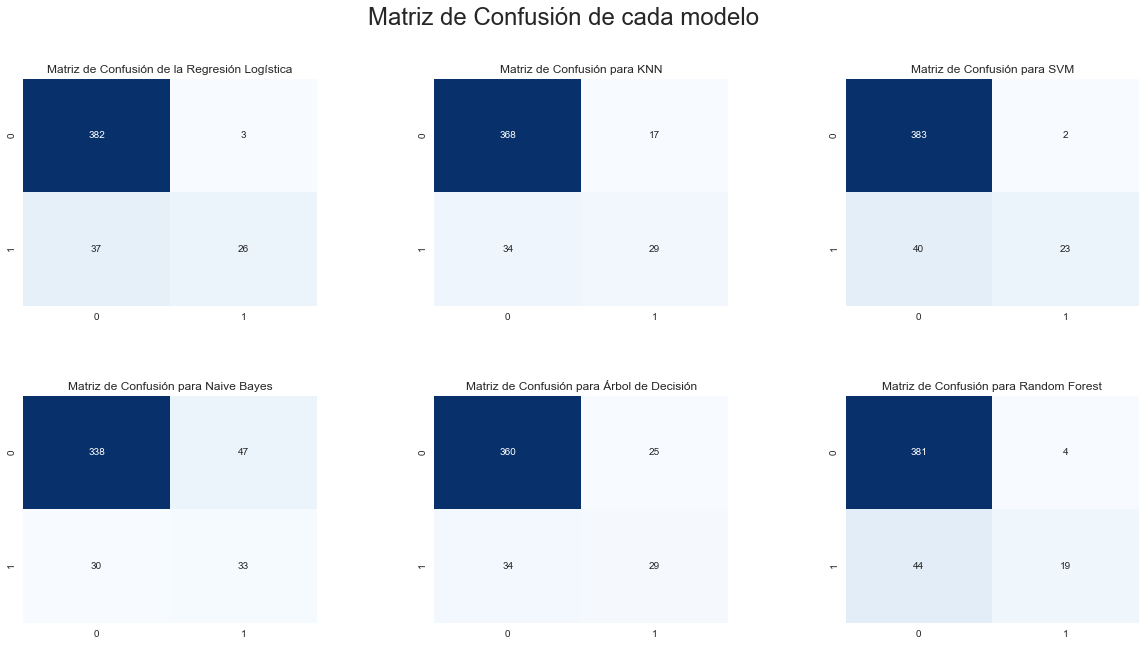

In [29]:
plt.figure(figsize=(20,10))

plt.suptitle("Matriz de Confusión de cada modelo",fontsize=24)
plt.subplots_adjust(wspace = 0.4, hspace= 0.4)

plt.subplot(2,3,1)
plt.title("Matriz de Confusión de la Regresión Logística")
sns.heatmap(cm_lr,annot=True,cmap="Blues",fmt="d",cbar=False)

plt.subplot(2,3,2)
plt.title("Matriz de Confusión para KNN")
sns.heatmap(cm_knn,annot=True,cmap="Blues",fmt="d",cbar=False)

plt.subplot(2,3,3)
plt.title("Matriz de Confusión para SVM")
sns.heatmap(cm_svm,annot=True,cmap="Blues",fmt="d",cbar=False)

plt.subplot(2,3,4)
plt.title("Matriz de Confusión para Naive Bayes")
sns.heatmap(cm_nb,annot=True,cmap="Blues",fmt="d",cbar=False)

plt.subplot(2,3,5)
plt.title("Matriz de Confusión para Árbol de Decisión")
sns.heatmap(cm_dtc,annot=True,cmap="Blues",fmt="d",cbar=False)

plt.subplot(2,3,6)
plt.title("Matriz de Confusión para Random Forest")
sns.heatmap(cm_rf,annot=True,cmap="Blues",fmt="d",cbar=False)

plt.show()

<AxesSubplot:>

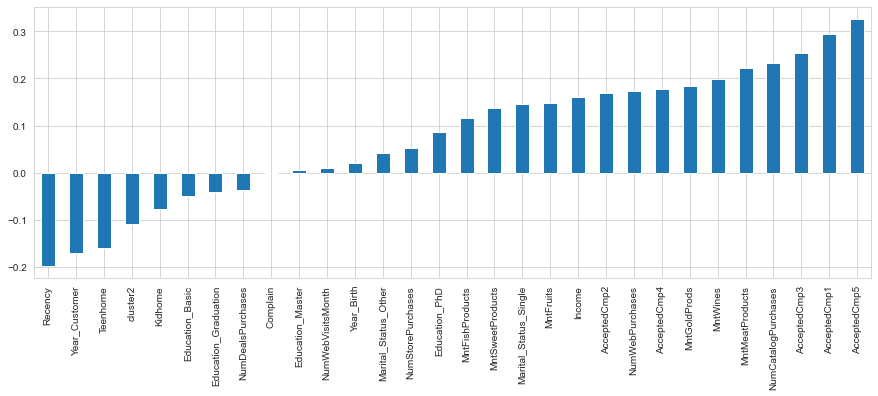

In [30]:
# Correlación de las variables con respecto a la variable target 
for column in df.columns: df[column] = df[column].astype("float")
corrs = df.corr(method="spearman")["Response"]
corrs.drop("Response", inplace=True)
corrs.sort_values(inplace=True)
plt.figure(figsize=(15, 5))
corrs.plot(kind="bar", use_index=True, rot=90)

## Guardar el modelo entrenado

In [31]:
# Librería de sklearn a utilizar para guardar el modelo
import joblib as jb
import sklearn.externals

In [32]:
clf_rf = rf

In [33]:
x_train=x_train.T

In [34]:
y_train.shape

(1792,)

In [35]:
# Ahora supongamos que tenemos el siguiente modelo, clf_rf, ya entrenado:
clf_rf.fit(x_train, y_train) # Entrenamiento del modelo

RandomForestClassifier(n_estimators=1000, random_state=1)

In [36]:
# Podemos guardarlo realizando un joblib.dump():
jb.dump(clf_rf, 'modelo_entrenado.pkl') # Guardo el modelo.

['modelo_entrenado.pkl']

##  Carga del modelo entrenado

In [37]:
# Cuando necesitemos cargar el modelo ya entrenado, simplemente hacemos un joblib.load():
clf_rf = jb.load('modelo_entrenado.pkl') # Carga del modelo.

In [38]:
# Si queremos asegurarnos que el modelo se ha guardado correctamente, podemos calcular el rendimiento del modelo antes de 
# guardarlo y al cargarlo de nuevo de la siguiente forma:
clf_rf.score(x_train, y_train)

0.9933035714285714